#### <h1><center> WebScraping </h1>
<h1><center> Anno Accademico 2022-2023 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 15 </h1>
<h1><center>  Complex Network analysis: </h1> 
<h1><center>  Introduction </h1>  
<h1><center> 15 Marzo 2023 </h1>

# Networks: introduzione

* several dataset contains entities connected by some relationship
    * we need a way to representthe relationships among a collection of objects.
    
<img src="Figures/Network.jpg" style="width:400px;height:300px;"/>

* Network $\equiv$ Graph? 
    * generally, the two term are used in the same way, but...

* Network <nodes, links> refers to real systems
    * (www, social network, metabolic network)

* Graph <vertices, edges>
    * mathematical representation of a network
    * web graph, social graph

* Consists of a set of objects, called nodes, with certain pairs of these objects connected by links called edges.


<img src="Figures/TableNetwork.jpg" style="width:500px;height:300px;"/>

# Complex Networks: my Linkedin Network

<img src="Figures/Linkedin.jpg" style="width:600px;height:600px;"/>

# Complex networks: Bitcoin's user graph (2013)

<img src="Figures/Bitcoin.jpg" style="width:800px;height:600px;"/>

# Complex Networks: the Bitcoin Lightning Network (2018)

<img src="Figures/Lightning.jpg" style="width:800px;height:600px;"/>

# Complex Network Science

* complex network analysis
     * a discipline which has recently received a lot of attention

* to study a complex system by exploring the structure and dynamics of the underlying network
    * applied in different fields: economy, biology and many basic sciences
    * approached from different perspectives:
        * theoretical
        * experimental: it is possible, due to recent availability of huge datasets

* two different aspects
    * structure: the “shape” of the network
    * dynamics: how the shape changes over time and how information is propagated on the network

# Complex Network Science

* complex networks include millions of nodes: 
    * “classic graph analysis” for networks of small dimension is no more useful

* some examples:
    * an interesting property for a small dimension network: “does it exist a vertex which is indispensable to maintain the network connectivity?”
    * an interesting property for a complex network: “which is the percentage of nodes which are to be removed to modify the network connectivity at some degree”?

* proper models for these networks should be defined to describe the properties of the topology

* the analysis of complex networks often requires tools based on the statistical analysis of the network properties

# Complex Network Science

* what are the main properties characterizing a complex network ?
    * average length of paths
    * clustering
    * distribution of nodes degrees
    * network resilience
    * giant component formation
    * centrality measures: are there vertexes which are more important than others?

* what mathematical model is able to describe and generate networks having fixed characteristics?
    * for instance low diameter and high clustering coefficient, such as social networks
    * new models recently proposed which are more suitable for describing social and P2P networks

# NetworkX: a Python Library for graph analysis

*“Python package for the creation, manipulation and study of the structure, dynamics and functions of complex networks.”*

* data structures for representing many types of networks through graphs
* fully integrated in **Python**
    * nodes can be any (hashable) Python object
    * edges are tuples with optional edge data (stored in dictionaries)
* flexibility ideal for representing networks found in many different fields
* easy to install on multiple platforms
* online up-to-date documentation
* first public release in April 2005, continous development

# NetworkX: why should I USE NetworkX to perform network analysis?

* unlike many other tools, it is designed to handle data on a scale relevant to a good set of modern problems
    * but not all
    * huge transaction graph for blockchain systems
* most of the core algorithms rely on extremely fast legacy code
* highly flexible graph implementations (a graph/node can be anything!)
* extensive set of native readable and writable formats
* takes advantage of Python’s ability to pull data from the Internet or databases



# NetworkX: why should I AVOID NetworkX to perform network analysis?

* large-scale problems that require faster approaches (i.e. massive networks
with 100M/1B edges)
* better use of memory/threads than Python (large objects, parallel computation)
    * parallel frameworks
    * **SPARKS**

# NetworkX: computing shortest and weighted shortest path

* let us consider the graph below, where the size of the arcs correspond to their weight
* compute the shortest path and the weighted shortest path

<img src="Figures/ShortestPathExample.jpg" scale=0.2/>

In [1]:
import networkx as nx
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
g = nx.Graph()
g.add_edge('a','b',weight=0.1)
g.add_edge('b','c',weight=1.5)
g.add_edge('a','c',weight=1.0)
g.add_edge('c','d',weight=2.2)
print (nx.shortest_path(g,'b','d'))
print (nx.shortest_path(g,'b','d',weight='weight'))

['b', 'c', 'd']
['b', 'a', 'c', 'd']


# Graph Creation

* **NetworkX** offers different ways to build a graph
   * adding/removing a single node/edge 
   * reading nodes and edges from a file
   * generate the nodes and edges through some mathematical tool
* **NetworkX** support all these methods

# Generating a graph 

* edges are generated by a considering a mathematical model

    * find a proper model which is able to generate a network mimicking some real phenomena

* in ‘90: the problem has been deeply studied to model complex networks like **Internet**, **WWW** and **P2P**

* proposed Models:

    **Random Graphs**: a simple model, but it is not able to describe some interesting properties, for instance highly clustered networks   
    **Watts-Strogatz**: small worlds + clustering    
    **Kleinberg**: small worlds + finding short paths    
    **Barabasi-Albert**: scale free networks

# Random Graph:  (Erdos, Renyi, years'50) 

* a basic model for the analysis of complex networks
    * consider a set of nodes
    * start with a collection of **n** disconnected nodes.
    * create an edge between each pair of nodes with a probability **p**, independently of every other edge.
    * each connection is independent from the others (Binomial or Poisson Distribution).

* is this a good model for complex networks?
    * it seemed  till 20 years ago
    * but technological evolution has
        * enabled an experimental analysis of the structure of the real complex networks with millions of nodes
        * shown that the random model does not completely reflect the structure of many complex networks
        
* we will start from this model 
    * a good basis for studying other models!

# Random Graph:  (Erdos, Renyi, years'50) 

* **Erdos-Renyi Model**: a undirected  graph $G_{n,p} (ER(n,p))$, two parameters
    * **n** number of nodes
    * **p** probability

* construction procedure:  
    * for each pair of nodes $(u,v), u \neq v$ among the  $\binom{n}{2}$ = $\frac{n(n-1)}{2}$ possible pairs, “flip” a “biased” coin that comes up “heads” with probability **p** 
        * if it flips “heads”, then add the edge to the network
        * if it flips “tails”, do not add the edge to the network
    * this is equivalent to add the considered edge to the graph with probability  p,

* independent choices: the presence/absence of an edge is independent from that of other ones 

* a simple graph: no self cycle,  at most one edge between two different vertices

# Random Graph:  (Erdos, Renyi, years'50) 

<img src="Figures/ER1.jpg" scale=0.2/>

* example $n=5$, $p=0.6$
* number of possible edges $n(n-1)/2$ = $5 \times 4/2 = 10$
* ten flips of a coin that comes up heads $40\%$, tails $60\%$

<img src="Figures/ER2.jpg" scale=0.2/>

* average node degree = $2.4 = (n-1) \times p = 4 \times 0.6 $


# Erdos, Renyi graph in NetworkX, n=20, p=0

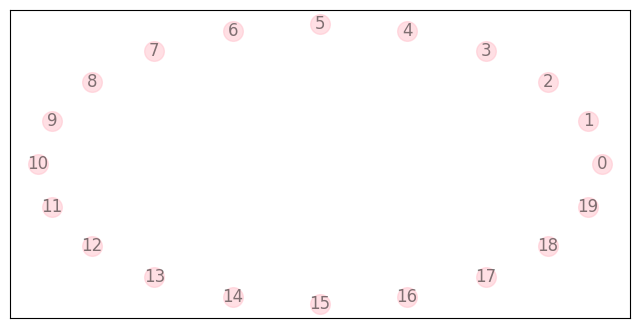

In [2]:
import random
from IPython.display import Image

# Generate the graph
n = 20
p = 0
G_erdos = nx.erdos_renyi_graph(n,p, seed =100)

# Plot the graph
plt.figure(figsize=(8,4))
posizione_circular = nx.circular_layout(G_erdos)
nx.draw_networkx(G_erdos, pos= posizione_circular, node_size=200, alpha=0.5, node_color='pink')



# Erdos, Renyi graph in NetworkX, n=50,  p=0.2

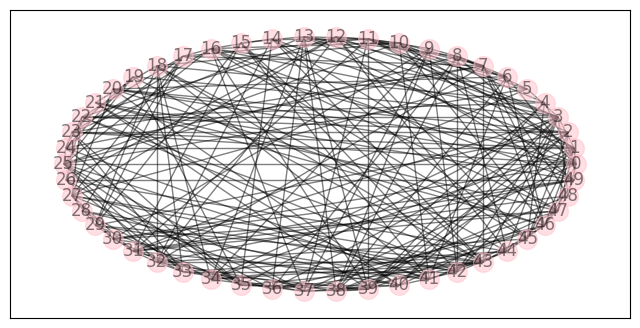

In [3]:
g1 = nx.erdos_renyi_graph(50, 0.2)
plt.figure(figsize=(8,4))


posizione_circular = nx.circular_layout(g1)
nx.draw_networkx(g1, pos= posizione_circular, node_size=200, alpha=0.5, node_color='pink')


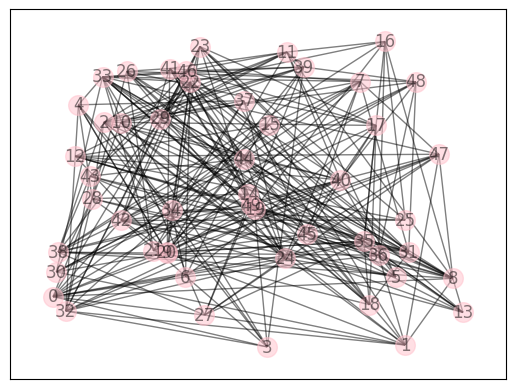

In [5]:
r_layout = nx.random_layout(g1)
nx.draw_networkx(g1, pos= r_layout, node_size=200, alpha=0.5, node_color='pink')

# Erdos, Renyi graph in NetworkX, n= 50, p=0.2

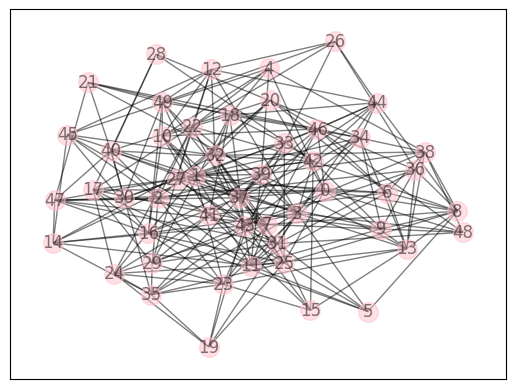

In [4]:
f_layout = nx.fruchterman_reingold_layout(g1)
nx.draw_networkx(g1, pos= f_layout  , node_size=200, alpha=0.5, node_color='pink')

### Erdos, Renyi graph in NetworkX, n=30, p=1

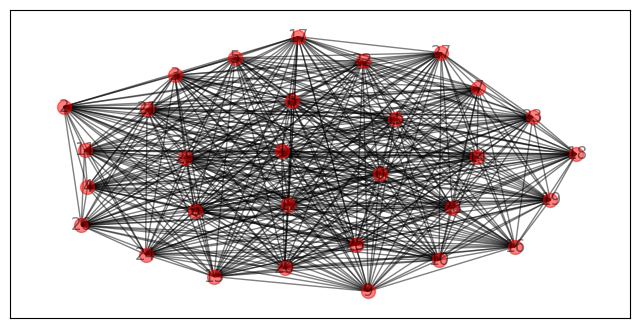

In [5]:
# Generate the graph
n =30
p = 1
G_erdos = nx.erdos_renyi_graph(n,p, seed =100)

# Plot the graph
plt.figure(figsize=(8,4))

nx.draw_networkx(G_erdos, node_size=100, alpha=0.5, node_color='red')


# Erdos, Renyi graph in NetworkX, n=100, p=0.15

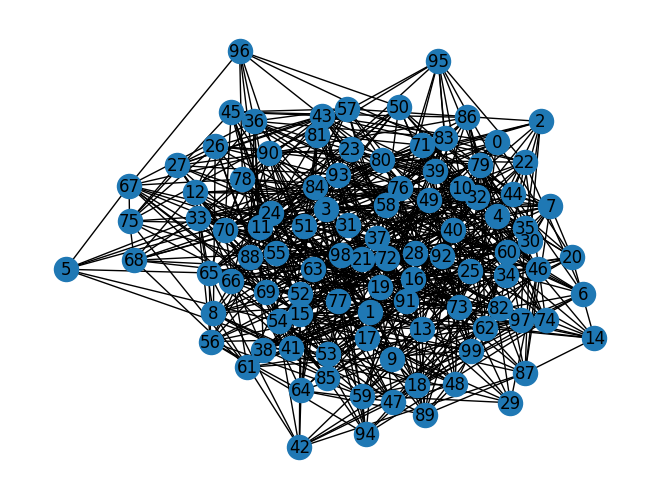

In [6]:
er = nx.erdos_renyi_graph(100, 0.15) #100 nodes connected with probability 0.15
nx.draw(er, with_labels=True)


# Node Degree distribution

* Degree of a node  **v** of an **undirected graph**, **$\delta(v)$**: number of edges incident in **v**. 
    * a cycle is counted twice. 
    * in-degree, out-degree for oriented graphs

* the analysis of the distribution of node degrees returns information on the network structure, for instance:
    *  if most vertexes have the same degree (uniform distribution), all the vertexes have similar roles in the network
    * if only some nodes with a high degree, these are “hubs” and the network may be partitioned if they are removed

* tools for the analysis of the node degree:
    * histograms: shows the number of vertexes with a given degree
    * degree sequences
    * degree correlation

# Node Degree distribution

In [7]:
vk = dict(er.degree())
vl = list(vk.values())
vn = list(vk.keys())
print('Nodes', vn)
print('Degree', vl)


Nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Degree [13, 14, 10, 22, 14, 7, 11, 15, 13, 11, 15, 18, 12, 20, 10, 18, 22, 15, 16, 18, 12, 22, 13, 12, 18, 17, 12, 12, 15, 8, 16, 17, 14, 14, 13, 13, 13, 19, 11, 17, 16, 16, 10, 19, 15, 12, 15, 13, 12, 15, 12, 20, 18, 15, 15, 15, 12, 14, 17, 14, 15, 12, 17, 16, 12, 16, 11, 13, 10, 15, 19, 14, 16, 17, 9, 11, 22, 16, 15, 18, 17, 11, 12, 13, 19, 11, 12, 12, 15, 13, 16, 22, 21, 16, 11, 11, 8, 13, 16, 16]


* **degree** è una proprietà dell'oggetto Graph **Python**
* è un tipo **DegreeView**, che può essere trasformato in un **dizionario**
* stampo chiavi (numero del nodo) e valori del dizionario

# Node Degree distribution

* calcoliamo il grado medio dei nodi

In [9]:
md = mean(vl)
print('Mean degree: ', md)

Mean degree:  15.3


* definiamo una funzione che restituisca la distribuzione dei gradi

In [9]:
def degree_distribution(G):
    vk = dict(er.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(vk)
    print(maxk)
    print(mink)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [10]:
ks, Pk = degree_distribution(er)
print (ks)
print (Pk)


22
7
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[0.   0.   0.   0.   0.   0.   0.   0.01 0.02 0.01 0.04 0.09 0.14 0.11
 0.07 0.14 0.12 0.07 0.06 0.04 0.02 0.01 0.05]


# Plottare la distrbuzione dei nodi del grafo

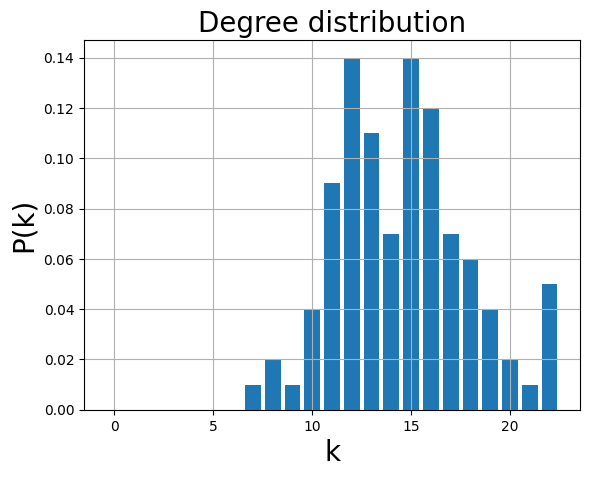

In [11]:
plt.figure()
# plt.loglog(ks,Pk,'bo',basex=10,basey=10)
plt.bar(ks,Pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
# plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)


# Erdos, Renyi: distribuzione dei gradi dei nodi

* let us study the node degree distribution from a theoretical point of view
* compute the probability that the degree of vertex **u** is  equal to **k**, $\forall k:  0\leq k \leq n-1$
    * a node has degree zero if all coins flips involving n are “tails”
    * a node has degree (n-1) if all coins flips involving n are “heads" 
    * for a node to have degree k,  the n-1 flips must have resulted in k “heads” and  n-1-k “tails”
    * since the probability of heads is “p” the probability of “tail” is 1-p, the outcome of k “heads” and n-1-k "tails" occurs       with probability
    
    $p^k \times (1-p)^{n-1-k}$

    * but we must choose among the other n-1 vertexes, k vertexes to connect to u and there are             
    
    $\binom{n-1}{k}$
    
    ways to choose k different vertexes out of n-1 vertexes 

* the probability that the degree of a node is $k$, is therefore

   $\binom{n-1}{k} \times  p^k \times (1-p)^{n-1-k}$

* therefore,the degree distribution in a Erdos Renyi graph may be represented by a **binomila distribution**
* the expected value for a **binomial distribution** is $ p \times (n-1)$
* average degree of the nodes of our Erdos, Renyi graph is 
    * $p=0,15, n=100$  = $0,15 \times 100 = 15$


# Graph Diameter

* distance between the nodes d and u of the graph = **minimal path length between u and v.**
* diameter of a graph is the **longest of the distances** between all pairs of nodes. it is the longest shortest path

<img src="Figures/Diameters.jpg" scale=0.2/>

* in a connected network with n nodes, the diameter is in the range 1 (completely connected) to n-1 (linear chain)

* in a random graph: for a given n, vary the parameter p from 0 to 1

    * at some critical value of p the diameter becomes finite (the network becomes connected) and continues 
      to decrease becoming  1 when p=1 


# Erdos, Renyi: Graph Diameter

In [12]:
d = nx.diameter(er)
print('Network diameter:', d)

Network diameter: 3


In [13]:
if nx.is_connected(er) == True:
    l = nx.average_shortest_path_length(er)
    print("Average shortest path length:", "%3.4f"%l)

Average shortest path length: 1.9491


# Erdos, Renyi: Graph Diameter

* let us study the diameter from a theoretical point of view

* a simplification: 
    * a tree structured network of nodes with identical degree k equal to the average degree $p \times (n-1)$

* starting from a given node (that circled in red), how many nodes can be reached after L steps?

    * after $1$ step reach $k$ nodes
    * after $2$ steps reach $k\times(k-1)$ nodes
    * after $3$ steps reach $k\times(k-1)\times(k-2)$ nodes
    * and so on....
    
    <img src="Figures/DiameterProof.jpg" scale=0.2/>

# Erdos, Renyi: Graph Diameter

* the number of nodes reached  
    * grows exponentially step by step
    * after L steps, can be approximated as $K^L$

* how many steps to reach  all $n-1$ nodes, starting from the central node?
    * $K^L = n-1$ and $L$ is an approximation of the diameter
    * $log K^L$ = $log n$  $\Rightarrow$ $L  \times log K$ = $log n$ $\Rightarrow$ $L = log n / log  K$

* the “separation degree” of a random graph logarithmically grows with respect to the number of nodes:
    * low diameter
    * the model captures the “low diameter” property observed in many real networks
    * the ER model is a “good predictor” of diameter and average path lengths of many real networks


# Clustering Coefficient of a node

* given a vertex v, defines “how much the friends of v are mutually friends”
    * my friends are friends, in turn
    * the friend of my friend is my friend


 <img src="Figures/CC1.jpg" scale=0.2/>

* real networks are often clustered and contain different communities
    * several links between the nodes of a community (high clustering) , a few links between different communities

* the clustering coefficient exploited for studying the information diffusion in social networks: how fast information is spread in a social network?



# Clustering Coefficient of a node

* defines, given a vertex v, “how much the friends of v are mutually friends”
    * is defined as the ration between the nodes existing between the neighbour of the node and the maximum number of edges that may occur between the neighbour of the node


 <img src="Figures/CC2.jpg" scale=0.2/>

* what is the clustering coefficient of node A?
    * A has four friends (grey lines)
    * among the four friends there are $\frac{4\times3}{2}$ possibility of friendships
    * but only four of them are actually present (the blue ones, missing the red dotted ones)
    * thus, the clustering coefficient of node A is 4/6=0.6666

# Clustering Coefficient of a node

 <img src="Figures/CC3.jpg" scale=0.2/>

# Clustering coefficient of a graph: first definition

* the clustering coefficient of a graph is the average of the clustering coefficients of all the vertices of the graph

 <img src="Figures/CC4.jpg" scale=0.2/>

# Clustering coefficient of a graph: second definition

* the clustering coefficient of a graph is the proportion of triples of the graph wih respect to those that are actually closed (form a trinagle)
* in the following example
    * the number of possible triangles is 10 (5 choose 3 = 5!/3!2!) 
    * the number of closed triangles is 3 (red, green and brown).
    *  the clustering coefficient is 3/10=0.3 (compare to 0.7666 !)


 <img src="Figures/CC5.jpg"> <img src="Figures/CC6.jpg">

* number of possible triangles is 10 (5 choose 3 = 5!/3!2!) 
* number of closed triangles is 3 (red, green and brown).
* clustering coefficient is 3/10=0.3 (compare to 0.7666 !)

# Clustering coefficient in NetworkX 

In [14]:
avc = nx.average_clustering(er)
print("Average clustering:", "%3.4f"%avc)


Average clustering: 0.1520


In [15]:
vcc = []
for i in er.nodes():
    vcc.append(nx.clustering(er, i))
vcc= np.array(vcc)
print('Clustering of all nodes:', vcc)


Clustering of all nodes: [0.26923077 0.12087912 0.24444444 0.16883117 0.17582418 0.19047619
 0.16363636 0.14285714 0.15384615 0.14545455 0.12380952 0.15686275
 0.12121212 0.11052632 0.13333333 0.11764706 0.11688312 0.11428571
 0.1        0.06535948 0.09090909 0.18181818 0.1025641  0.18181818
 0.15686275 0.125      0.15151515 0.1969697  0.15238095 0.07142857
 0.16666667 0.11029412 0.14285714 0.16483516 0.21794872 0.15384615
 0.16666667 0.15789474 0.14545455 0.11029412 0.16666667 0.15
 0.11111111 0.14619883 0.17142857 0.15151515 0.16190476 0.11538462
 0.10606061 0.17142857 0.15151515 0.12631579 0.12418301 0.14285714
 0.1047619  0.17142857 0.15151515 0.15384615 0.14705882 0.12087912
 0.17142857 0.24242424 0.19852941 0.1        0.12121212 0.125
 0.25454545 0.14102564 0.22222222 0.14285714 0.1754386  0.15384615
 0.15       0.18382353 0.08333333 0.21818182 0.16017316 0.15833333
 0.19047619 0.16993464 0.16176471 0.16363636 0.16666667 0.14102564
 0.15204678 0.14545455 0.12121212 0.16666667 0.1

# Clustering coefficient and graph density

* the value of clustering coefficient(CC) ranges from 0 to 1

* is an high value of CC alone sufficient to conclude that a network exhibits a high clustering?
    * CC close to 1 implies high clustering ?
    * CC close to 0 implies low clustering ?

* this is not necessarily true: a network very dense would have always a high clustering coefficient?

    * what is required 
        * the probability of defining an edge between two nodes increases if the two nodes have a common neighbour
        * some number of triangles in a network could be closed simply by chance
    * high clustering if the actual likelihood of a triangle being closed is substantially greater than we would expect due to a pure chance

# Graph Density: definition

* edge density is the  actual number of edges of the graph in proportion to the maximum number of possible edges

 <img src="Figures/density.jpg"> 

* if $\rho$ is small then the network is sparse, if $\rho$  is large, then the network is dense

 <img src="Figures/density1.jpg"> 

* suppose we pick two nodes of a network at random without regard to the network structure 
    * we do not consider if the two nodes share common neighbours or not.
    * the probability p that the two nodes are connected is related to  the edge density of the network


# Clustering Coefficient and Network density

* compare the clustering coefficient  to the edge density of the network
      
* high clustering if  $CC >> \rho$


 <img src="Figures/CC7.jpg"> 

# Erdos, Renyi: Clustering Coefficient

* let us study the CC from a theoretical point of view

* recall the clustering coefficient of a node is the probability that two randomly selected neighbours are neighbours themselves

* in a ER graph, a pair of neighbours is connected with probability **p**, independently of their context

* the clustering coefficient of a ER network is equal to **p**
    * for instance il $p=0.2$, $20\%$ of the edges between the neighbours are, on the average, present. So the clustering coefficient us $0.2$
    * is this a high or a low value? ER networks with an high value of p are also highly clusterised?


# Erdos, Renyi: Clustering Coefficient

* In a random graph
     * the average vertex degree depends on the probability $p$ and from the number of vertexes of the graph.

     * all the nodes on the average have the same degree.
        
    * the network diameter is low. (logarithmic)
    
    * the clustering coefficient is low and therefore these networks are not suitable to model the aggregation, which is a characteristics of many real networks
    
    * the low clustering coefficient enables to obtain a low value of the separation degree of the nodes.

# Erdos, Renyi: Clustering Coefficient

* ER model
     * on the average, $m= p \times n \times (n-1)/2$  edges are added to the graph 
     * edge density of a ER network

 <img src="Figures/density3.jpg"> 

* the clustering coefficient and the edge density are both equal to the probability of putting an edge
     * ER graphs are not highly clustered
     * if some triangle is closed, it is closed by chance 

* The ER model is a “poor” predictor of clustering compared to real networks

* most “real networks” are generally “highly clustered” with clustering coefficient that are much greater then their edge density

# NetworkX: creare un grafo step by step

* consideraimo la creazione step-by-step di un grafo **non orientato**

* igrafi non orientati vengono modellati dalla classe __Graph__.

* questa classe utilizza una struttura di tipo **dictionary** di **dictionary**
    * nel dizionario più esterno le chiavi sono i **nodi**
    * i valori associati ai nodi sono a loro volta di tipo dictionary
    * nel dizionario più interno le chiavi sono i **nodi vicini**
    * i valori del dizionario più interno sono a loro volta un dictionary che ha per chiave un valore dell'attributo dell'arco e per valore il valore dell'attributo sull'arco che connette il nodo al vicino

* il dictionary più esterno utilizza come chiave i nodi.

* i nodi possono essere  qualsiasi oggetto __hashable__.

* per __creare un grafo__ si invoca il costruttore **Graph**

# Creare un grafo aggiungendo singolo nodi o archi

In [17]:
grafo_non_orientato = nx.Graph()
grafo_non_orientato.add_node('A')


* oppure è possibile inserire più nodi nello stesso momento passando un qualsiasi oggetto iterabile, anche un grafo stesso ...

In [18]:
grafo_non_orientato.add_nodes_from(['B','C'])
line_graph = nx.path_graph(4)
grafo_non_orientato.add_nodes_from(line_graph.nodes()) #nodi 'semplici'


* nella seconda istruzione viene creato un iteratore sull'insieme dei nodi del grafo *line_graph*.


In [19]:
grafo_non_orientato.nodes()

NodeView(('A', 'B', 'C', 0, 1, 2, 3))

In [20]:
list(grafo_non_orientato.nodes())

['A', 'B', 'C', 0, 1, 2, 3]

# Attributi di un nodo

* ad un nodo posso associare uno o più oggetti che lo caratterizzano = __attributi__. 
* gli attributi vengono memorizzati in una struttura dict-like.
* posso assegnare un attributo ad un nodo al momento della creazione ...

In [21]:
grafo_non_orientato.add_node('D',name='Mario',likes='songs')


* oppure è possibile modificare o inserire un nuovo attributo ad un nodo già inserito, utilizzando l'attributo __nodes__ dell'oggetto _Graph

In [22]:
grafo_non_orientato.nodes['B']['name'] = 'Marco'


Per iterare sui nodi e i relativi attributi utilizzo il metodo **nodes** 

In [23]:
list(grafo_non_orientato.nodes(data=True))

[('A', {}),
 ('B', {'name': 'Marco'}),
 ('C', {}),
 (0, {}),
 (1, {}),
 (2, {}),
 (3, {}),
 ('D', {'name': 'Mario', 'likes': 'songs'})]

# Attributi di un nodo

* mediante il dictionary **nodes** posso ottenere le informazioni associate al nodo e il valore dei singoli attributi di quel nodo.

In [24]:
print(grafo_non_orientato.nodes['D']['name'])
print(grafo_non_orientato.nodes['D'])

Mario
{'name': 'Mario', 'likes': 'songs'}


In [25]:
grafo_non_orientato.nodes['D']['place'] = 'Roma'


In [25]:
grafo_non_orientato.nodes['D']


{'name': 'Mario', 'likes': 'songs'}

# Archi

* Come per i nodi, posso inserire gli archi uno alla volta, specificandone gli estremi dell'arco

In [27]:
grafo_non_orientato.add_edge('A','B')

* Oppure passando una lista di coppie (__tuple__ in Python) o triplette. Le triplette vengono utilizzate per specificare gli attributi associati all'arco

In [28]:
grafo_non_orientato.add_edges_from([('B','C'),('C','D')])

* Il metodo __edges()__ restituisce una lista di tuple rappresentati gli archi nel grafo.

In [29]:
list(grafo_non_orientato.edges())

[('A', 'B'), ('B', 'C'), ('C', 'D')]

# Attributi

* anche agli archi posso associare degli attributi memorizzati come dictionary.

* posso assegnare un attributo al momento della sua creazione

In [26]:
grafo_non_orientato.add_edge(0,1,peso=30)


* oppure si può modificare il dictionary __edges__ associato all'oggetto _Graph_

* Il metodo __nodes()__ mi restituisce una NodeView, passabile come argomento del costruttore **list()**

In [31]:
grafo_non_orientato.edges['A','B']['peso'] = 3

* oppure in modo più conciso

In [32]:
grafo_non_orientato['C']['B']['peso'] = 40
list(grafo_non_orientato.edges(data=True))


[('A', 'B', {'peso': 3}),
 ('B', 'C', {'peso': 40}),
 ('C', 'D', {}),
 (0, 1, {'peso': 30})]

* per visualizzare gli archi e i relativi attributi utilizzo il metodo _edges()_ con il parametro __data=True__

In [33]:
grafo_non_orientato.edges['A','B']['peso'] = None
list(grafo_non_orientato.edges(data=True))


[('A', 'B', {'peso': None}),
 ('B', 'C', {'peso': 40}),
 ('C', 'D', {}),
 (0, 1, {'peso': 30})]

#  Rimozione archi e nodi

* per rimuovere gli archi e i nodi posso applicare i seguenti metodi:
    * *remove_node()*
    * *remove_nodes_from()*
    * *remove_edge()*
    * *remove_edges_from()*

che rappresentano la controparte dei metodi di inserimento visti in precedenza.

* per cancellare tutti gli elementi si invoca il metodo __clear()__

# Visualizzare un grafo 

* **NetworkX** fornisce dei metodi per visualizzare i grafi, tuttavia la visualizzazione è piuttosto semplice e limitata. 

* per questo motivo è meglio utilizzare strumenti per la visualizzazione dei grafi,  quali **Gephi**

* il metodo più semplice per la visualizzazione del grafo è __draw()__ di **NetworkX**

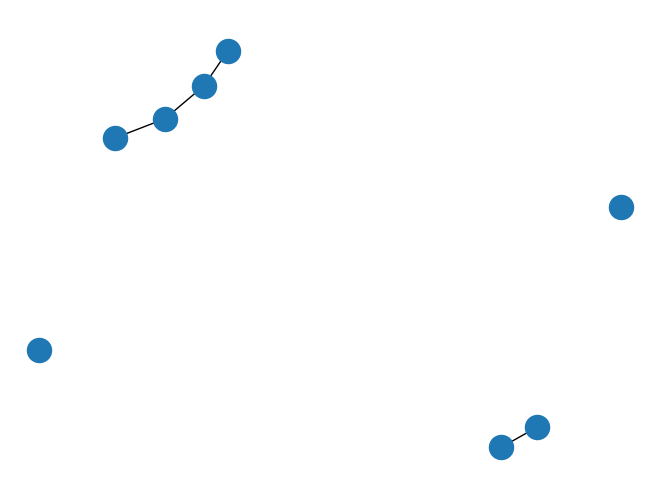

In [34]:
nx.draw(grafo_non_orientato)

# Visualizzare il grafo

__draw(G, pos=None, ax=None, hold=None, **kwds)__

* Draw the graph as a __simple representation with no node labels or edge labels__ and using the full Matplotlib figure area and no axis labels by default. See draw_networkx() for more full-featured drawing that allows title, axis labels etc.

* Parameters:	
        __G__ (graph) – A networkx graph

       __pos__ (dictionary, optional) – A dictionary with nodes as keys and positions as values. If not specified a spring layout positioning will be computed. See networkx.layout for functions that compute node positions.

        ax (Matplotlib Axes object, optional) – Draw the graph in specified Matplotlib axes.

       hold (bool, optional) – Set the Matplotlib hold state. If True subsequent draw commands will be added to the current axes.

       kwds (optional keywords) – See networkx.draw_networkx() for a description of optional keywords.

* è possibile passare la posizione dei nodi attraverso il __parametro pos__. Tale opzione permette di utilizzare più algoritmi di visualizzazione. In particolare adotteremo il metodo **spring_layout** ...

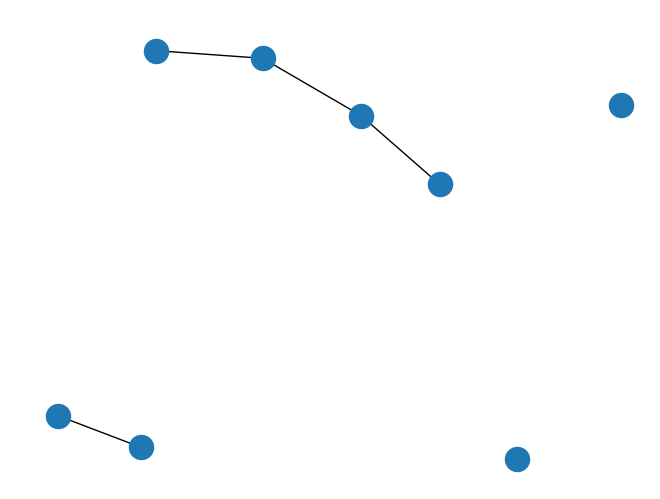

In [35]:
posizione = nx.spring_layout(grafo_non_orientato) # calcolo posizione nodi
nx.draw(grafo_non_orientato, pos = posizione) 
grafo_non_orientato.add_edge('A','D')


# Visualizzare il grafo

Gli altri metodi supportati sono:
* circular_layout
* fruchterman_reingold_layout
* random_layout
* shell_layout
* spectral_layout

Una visualizzazione più piacevole e più informativa si può ottenere utilizzando il metodo **draw_networkx()** (https://networkx.readthedocs.io/en/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

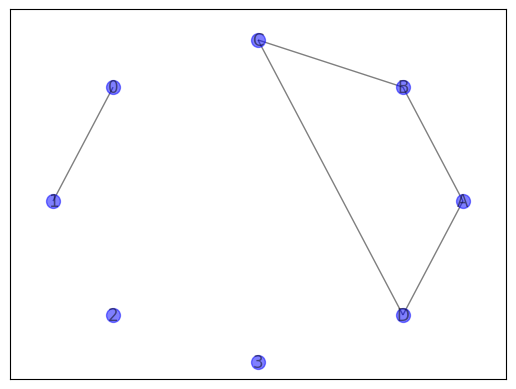

In [36]:
posizione_circular = nx.circular_layout(grafo_non_orientato)
nx.draw_networkx(grafo_non_orientato, pos= posizione_circular, node_size=100, alpha=0.5, node_color='blue')
